# Assemble data needed for KOIs

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table

In [19]:
# CKS catalogue:
cks = pd.read_csv("cks_physical_merged.csv")

# McQuillan catalogue:
mc = pd.read_csv("Table_1_Periodic.txt")

# Tim and my catalogue:
tdmra = pd.read_csv("koi_periods_0712.csv")

# Mazeh catalog
ma = pd.read_csv("mazeh.csv", skiprows=73, delimiter=";")

# Gaia DR2
dat = Table.read("kepler_dr2_1arcsec.fits", format='fits')
dr2 = dat.to_pandas()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'teff_err1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'teff_err2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
cks.head()

,id_starname,id_kic,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,koi_time0_err1,...,iso_prad_err2,iso_sma,iso_sma_err1,iso_sma_err2,iso_insol,iso_insol_err1,iso_insol_err2,iso_teq,iso_teq_err1,iso_teq_err2
0,K00001,11446443,K00001.01,Kepler-1 b,CONFIRMED,2.470613,1.900000e-08,-1.900000e-08,2454955.763,0.000006,...,-1.419266,0.035951,0.000596,-0.000596,890.712853,184.876216,-184.876216,1392.188224,71.758330,-71.758330
1,K00002,10666592,K00002.01,Kepler-2 b,CONFIRMED,2.204735,3.800000e-08,-3.800000e-08,2454954.359,0.000014,...,-2.018515,0.036880,0.000727,-0.000727,3029.593093,931.186264,-931.186264,1890.643307,146.140168,-146.140168
2,K00003,10748390,K00003.01,Kepler-3 b,CONFIRMED,4.887803,1.770000e-07,-1.770000e-07,2454957.813,0.000028,...,-0.410257,0.052952,0.000883,-0.000883,116.907786,20.094411,-20.094411,837.962116,35.981752,-35.981752
3,K00006,3248033,K00006.01,NaN,FALSE POSITIVE,1.334104,7.070000e-07,-7.070000e-07,2454966.702,0.000420,...,-21.966014,0.025383,0.000427,-0.000427,3595.445148,694.155894,-694.155894,1973.338972,95.179897,-95.179897
4,K00007,11853905,K00007.01,Kepler-4 b,CONFIRMED,3.213669,1.122000e-06,-1.122000e-06,2454956.612,0.000280,...,-0.596032,0.044247,0.001075,-0.001075,1233.844672,367.335736,-367.335736,1510.353647,112.889880,-112.889880


In [21]:
cks["kepid"] = cks.id_kic
cks_gaia = pd.merge(cks, dr2, on="kepid", how="left", suffixes=["_cks", "_gaia"])
print(np.shape(cks), np.shape(dr2), np.shape(cks_gaia))
cks_gaia = cks_gaia.drop_duplicates(subset="kepid")
print(np.shape(cks_gaia))

(2025, 121) (201312, 134) (2041, 254)
(1279, 254)


In [22]:
ma.head()

,KOI,KIC,Teff,log(g),Prot,e_Prot,Rvar,LPH,w,D,...,C,G,T,F,R,M1,M2,Simbad,_RA,_DE
0,1,11446443,5713,4.143,70.55,16.47,445.0,0.362359,0.000000,0,...,0,0,0,0,0,1,0,Simbad,286.80847,49.31640
1,2,10666592,6264,3.790,70.69,6.80,919.0,0.542156,0.000000,0,...,0,0,0,0,0,1,0,Simbad,292.24728,47.96952
2,3,10748390,4766,4.590,29.31,0.49,12246.0,0.607229,0.431926,0,...,0,0,0,0,0,0,0,Simbad,297.70935,48.08085
3,5,8554498,5861,4.170,37.23,4.18,237.0,0.082306,0.000000,0,...,0,0,0,0,0,1,0,Simbad,289.73972,44.64742
4,10,6922244,6213,4.170,82.12,16.05,1245.0,0.350827,0.000000,0,...,0,0,0,0,0,1,0,Simbad,281.28812,42.45108


In [23]:
cks_gaia_prot = pd.merge(cks_gaia, ma, left_on="kepid", right_on="KIC", how="inner")
print(np.shape(cks_gaia), np.shape(ma), np.shape(cks_gaia_prot))

df = cks_gaia_prot

(1279, 254) (3355, 21) (1129, 275)


(7000, 2900)

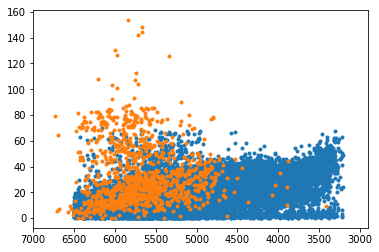

In [26]:
plt.plot(mc.Teff, mc.Prot, ".")
plt.plot(df.teff, df.Prot, ".")
plt.xlim(7000, 2900)

In [27]:
tdmra.head()

,Unnamed: 0,KOI,feh,feh_errm,feh_errp,logg,logg_errm,logg_errp,period,period_errm,period_errp,teff,teff_errm,teff_errp
0,0,1,-0.12,-0.280,0.330,4.609,-0.106,0.027,24.848716,1.089771,1.228143,5126.0,-138.0,160.0
1,1,2,-0.15,-0.100,0.100,4.455,-0.025,0.025,19.595792,1.074672,1.063685,5850.0,-50.0,50.0
2,2,3,0.26,-0.080,0.080,4.021,-0.011,0.011,28.159582,1.002070,1.027374,6350.0,-80.0,80.0
3,3,6,-0.04,-0.160,0.120,4.169,-0.048,0.055,22.765454,1.434925,1.041999,6225.0,-158.0,114.0
4,4,7,0.44,-0.101,0.101,4.081,-0.014,0.014,25.310087,1.021561,1.023450,5543.0,-79.0,79.0


In [32]:
ro = pd.merge(tdmra, ma, on="KOI", how="inner")
print(np.shape(tdmra), np.shape(ma), np.shape(ro))

(1102, 14) (3355, 21) (974, 34)


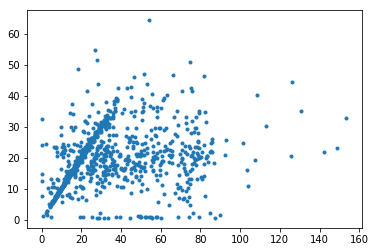

In [33]:
plt.plot(ro.Prot, ro.period, ".")

(7000, 2900)

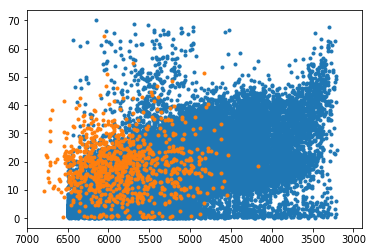

In [34]:
plt.plot(mc.Teff, mc.Prot, ".")
plt.plot(ro.teff, ro.period, ".")
plt.xlim(7000, 2900)

In [35]:
print(np.shape(df))

(1129, 275)


Calc Gaia noise.

In [37]:
def color_err(c):
    c_err = np.zeros(len(c))
    bright = c < 13
    medium = (13 < c) * (c < 17)
    faint = 17 <= c
    c_err[bright] = np.ones(len(c_err[bright]))*.002
    c_err[medium] = np.ones(len(c_err[medium]))*.01
    c_err[faint] = np.ones(len(c_err[faint]))*.2
    return c_err


def photometric_noise(G, bp, rp):
    G_err = np.zeros(len(G))
    bright = G < 13
    medium = (13 < G) * (G < 17)
    faint = 17 <= G
    G_err[bright] = np.ones(len(G_err[bright]))*.0003
    G_err[medium] = np.ones(len(G_err[medium]))*.002
    G_err[faint] = np.ones(len(G_err[faint]))*.01

    bp_err = color_err(bp)
    rp_err = color_err(rp)
    
    parallax_err = np.zeros(len(G))
    bright = G < 15
    medium = (15 < G) * (G < 17)
    faint = (17 < G) * (G < 20)
    ultra_faint = 20 <= G
    parallax_err[bright] = .03  # milliarcseconds
    parallax_err[medium] = .1
    parallax_err[faint] = .7
    parallax_err[ultra_faint] = 2
    
    return G_err, bp_err, rp_err, parallax_err

In [38]:
G_err, bp_err, rp_err, parallax_err = photometric_noise(df.phot_g_mean_mag,
                                                        df.phot_bp_mean_mag, 
                                                        df.phot_rp_mean_mag)

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [40]:
df["G_err"] = G_err
df["bp_err"] = bp_err
df["rp_err"] = rp_err
df["parallax_err"] = parallax_err

Calculate reddening.

In [41]:
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
import astropy.units as units

bayestar = BayestarQuery(max_samples=2, version='bayestar2019')

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 20.295 s
  pix_info:   0.498 s
   samples:   9.033 s
      best:   4.111 s
       nan:   0.202 s
      sort:   6.215 s
       idx:   0.236 s


In [47]:
from getdust import getDust

coords = SkyCoord(df.ra.values*units.deg, df.dec.values*units.deg,
                  distance=df.r_est.values*units.pc)

ebv, flags = bayestar(coords, mode='percentile', pct=[16., 50., 84.],
                      return_flags=True)

# Calculate Av
Av_bayestar = 2.742 * ebv
Av = Av_bayestar[:, 1]
Av_errm = Av - Av_bayestar[:, 0]
Av_errp = Av_bayestar[:, 2] - Av
Av_std = .5*(Av_errm + Av_errp)

# Catch places where the extinction uncertainty is zero and default to an
# uncertainty of .05
m = Av_std == 0
Av_std[m] = .05

df["ebv"] = ebv[:, 1]  # The median ebv value.
df["Av"] = Av
df["Av_errp"] = Av_errp
df["Av_errm"] = Av_errm
df["Av_std"] = Av_std

# Calculate dereddened photometry
AG, Abp, Arp = getDust(df.phot_g_mean_mag.values,
                       df.phot_bp_mean_mag.values,
                       df.phot_rp_mean_mag.values, df.ebv.values)

df["bp_dered"] = df.phot_bp_mean_mag.values - Abp
df["rp_dered"] = df.phot_rp_mean_mag.values - Arp
df["bprp_dered"] = df["bp_dered"] - df["rp_dered"]
df["G_dered"] = df.phot_g_mean_mag.values - AG

In [138]:
df.to_csv("cks_gaia_mazeh.csv")

Only look at stars with periods less than 50 days.

In [87]:
m = df.Prot.values < 50
df50 = df.iloc[m]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [88]:
for k in df.keys():
    print(k)

id_starname
id_kic
id_koicand
id_kepler_name
koi_disposition
koi_period
koi_period_err1
koi_period_err2
koi_time0
koi_time0_err1
koi_time0_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_ror
koi_ror_err1
koi_ror_err2
koi_srho
koi_srho_err1
koi_srho_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_sma
koi_sma_err1
koi_sma_err2
koi_teq
koi_teq_err1
koi_teq_err2
koi_insol
koi_insol_err1
koi_insol_err2
koi_dor
koi_dor_err1
koi_dor_err2
koi_max_mult_ev
koi_model_snr
koi_count
koi_num_transits
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_smet
koi_smet_err1
koi_smet_err2
koi_srad
koi_srad_err1
koi_srad_err2
koi_smass
koi_smass_err1
koi_smass_err2
koi_sage
koi_sage_err1
koi_sage_err2
koi_sparprov
kic_kepmag
kic_jmag
kic_hmag
kic_kmag
cks_fp
cks_steff
cks_steff_err1
cks_steff_err2
cks_slogg
cks_slogg_err1
cks_slogg_err2
ck

In [117]:
i = 1
iso_params = {"G": (df50.phot_g_mean_mag.values[i], G_err[i]),
              "BP": (df50.phot_bp_mean_mag.values[i], bp_err[i]),
              "RP": (df50.phot_rp_mean_mag.values[i], rp_err[i]),
              "teff": (df50.cks_steff.values[i], df50.cks_steff_err1.values[i]),
              "feh": (df50.cks_smet.values[i], df50.cks_smet_err1.values[i]),
              "logg": (df50.cks_slogg.values[i], df50.cks_slogg_err1.values[i]),
              "parallax": (df50.parallax.values[i], df50.parallax_error.values[i])}

In [118]:
from stardate.lhf import age_model

bprp = df50.phot_bp_mean_mag.values[i] - df50.phot_rp_mean_mag.values[i]
log10_period = np.log10(df50.Prot.values[i])
log10_age_yrs = age_model(log10_period, bprp)
print((10**log10_age_yrs)*1e-9, "Gyr")
print(df50.Prot.values[i], bprp)

4.273729079841484 Gyr
24.99 0.8210907


In [134]:
import stardate as sd

inits = [329.58, log10_age_yrs, -0.0478, 260, 0.0045]

star = sd.Star(iso_params, prot=df.Prot.values[i], prot_err=df.e_Prot.values[i],
               Av=df.Av.values[i], Av_err=df.Av_std.values[i])
star.fit(max_n=5000)

100%|██████████| 5000/5000 [01:14<00:00, 66.79it/s]

nsteps 5000 burnin 0


In [135]:
samples = star.samples

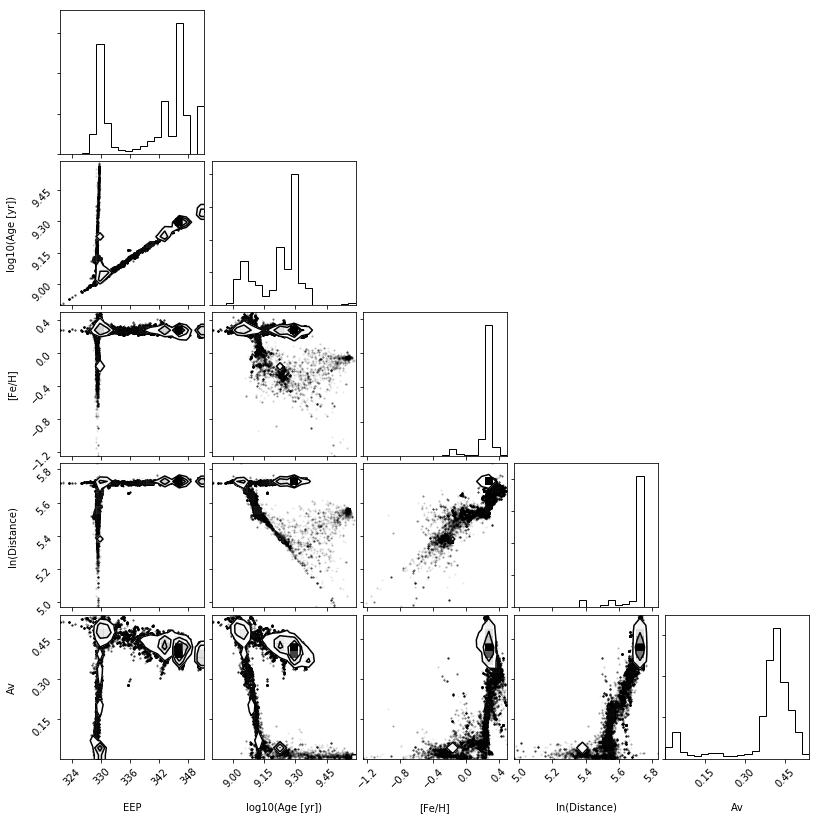

In [136]:
import corner

labels = ["EEP", "log10(Age [yr])", "[Fe/H]", "ln(Distance)", "Av", "ln(probability)"]

corner.corner(samples, labels=labels);

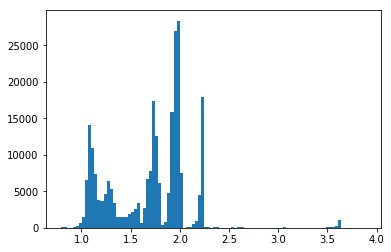

In [137]:
plt.hist((10**star.age_results()[3])*1e-9, 100);

13.803842646028867 Gyr


/Users/rangus/projects/stardate/stardate/lhf.py:147: RuntimeWarning: divide by zero encountered in log10
  log10_bprp = np.log10(bprp)


In [86]:
df.Prot.values[i]

70.55